# import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data.

In [2]:
content = pd.read_csv(r'C:\Users\roaia\Desktop\Anwar\New folder\accenture_virtual_experience_VE_by_Forage\Content.csv')
reactions = pd.read_csv(r'C:\Users\roaia\Desktop\Anwar\New folder\accenture_virtual_experience_VE_by_Forage\Reactions.csv')
reaction_types = pd.read_csv(r'C:\Users\roaia\Desktop\Anwar\New folder\accenture_virtual_experience_VE_by_Forage\ReactionTypes.csv')

In [3]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
# drop 'Unnamed: 0' column.
content.drop(columns='Unnamed: 0', axis=1, inplace=True)
reactions.drop(columns='Unnamed: 0', axis=1, inplace=True)
reaction_types.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
content.head(2)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...


In [8]:
reactions.head(2)

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50


In [9]:
reaction_types.head(2)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70


# Prepare and Clean

In [10]:
# drop 'User ID', 'URL' columns.
content.drop(columns=['User ID', 'URL'], axis=1, inplace=True)
reactions.drop(columns='User ID', axis=1, inplace=True)

In [11]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [12]:
reactions.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [13]:
# rename 'Type' column to avoid conflect.
content.rename(columns={'Type':'content_type'}, inplace=True)
reactions.rename(columns={'Type':'reactions_type'}, inplace=True)
reaction_types.rename(columns={'Type':'reactions_type'}, inplace=True)

In [14]:
content.head(2)

,Content ID,content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating


In [15]:
reactions.head(2)

,Content ID,reactions_type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50


In [16]:
reaction_types.head(2)

,reactions_type,Sentiment,Score
0,heart,positive,60
1,want,positive,70


In [17]:
# merge content & reactions on 'Content ID' and save result in content_reactions.
content_reactions = content.merge(reactions, on='Content ID')
content_reactions.head(2)

,Content ID,content_type,Category,reactions_type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50


In [18]:
# merge content_reactions &  reaction_types on 'reactions_type' and save result in df.
df = content_reactions.merge(reaction_types, on='reactions_type')
df.head(2)

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0


In [19]:
# check data validity.
df.select_dtypes(include=['object', 'datetime']).describe()

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment
count,24573,24573,24573,24573,24573,24573
unique,962,4,40,16,24562,3
top,d90a34f1-60ed-4a79-b7bf-fd22efa12e4c,photo,animals,heart,2020-07-23 09:21:02,positive
freq,48,6589,1765,1622,2,13807


In [20]:
print(df['content_type'].unique())

['photo' 'video' 'GIF' 'audio']


In [21]:
print(df['Sentiment'].unique())

['negative' 'positive' 'neutral']


In [22]:
print(df['reactions_type'].unique())

['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']


In [23]:
print(df['Category'].unique())

['Studying' 'healthy eating' 'dogs' 'public speaking' 'science' 'tennis'
 'food' 'fitness' 'soccer' 'education' 'studying' 'travel' 'veganism'
 'cooking' 'technology' 'animals' 'culture' 'Fitness' 'Veganism'
 '"animals"' 'Travel' '"soccer"' 'Animals' 'Education' '"dogs"'
 '"culture"' 'Soccer' 'Culture' 'Food' '"technology"' '"cooking"'
 '"public speaking"' 'Science' '"veganism"' 'Public Speaking' '"science"'
 '"studying"' '"food"' 'Healthy Eating' 'Technology']


In [24]:
# replace " " from values.
df['Category'] = df['Category'].str.replace('"', '', regex=True)
print(df['Category'].unique())

['Studying' 'healthy eating' 'dogs' 'public speaking' 'science' 'tennis'
 'food' 'fitness' 'soccer' 'education' 'studying' 'travel' 'veganism'
 'cooking' 'technology' 'animals' 'culture' 'Fitness' 'Veganism' 'Travel'
 'Animals' 'Education' 'Soccer' 'Culture' 'Food' 'Science'
 'Public Speaking' 'Healthy Eating' 'Technology']


In [25]:
# make all values in lower case
df['Category'] = df['Category'].str.lower()
print(df['Category'].unique())

['studying' 'healthy eating' 'dogs' 'public speaking' 'science' 'tennis'
 'food' 'fitness' 'soccer' 'education' 'travel' 'veganism' 'cooking'
 'technology' 'animals' 'culture']


In [26]:
# check data types.
df.dtypes

Content ID        object
content_type      object
Category          object
reactions_type    object
Datetime          object
Sentiment         object
Score              int64
dtype: object

In [27]:
# convert 'Datetime' to datetime.
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'].dtype

dtype('<M8[ns]')

# Analysis

In [28]:
df.head()

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Content ID      24573 non-null  object        
 1   content_type    24573 non-null  object        
 2   Category        24573 non-null  object        
 3   reactions_type  24573 non-null  object        
 4   Datetime        24573 non-null  datetime64[ns]
 5   Sentiment       24573 non-null  object        
 6   Score           24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


In [30]:
df.select_dtypes(include='object').describe()

,Content ID,content_type,Category,reactions_type,Sentiment
count,24573,24573,24573,24573,24573
unique,962,4,16,16,3
top,d90a34f1-60ed-4a79-b7bf-fd22efa12e4c,photo,animals,heart,positive
freq,48,6589,1897,1622,13807


In [31]:
df.select_dtypes(exclude='object').describe()

,Score
count,24573.000000
mean,39.622553
std,26.043011
min,0.000000
25%,15.000000
50%,35.000000
75%,65.000000
max,75.000000


## **Q:How many count for each content_type?**

In [32]:
# group df by 'content_type' DSC.
df['content_type'].value_counts(ascending=False)

photo    6589
video    6245
GIF      6079
audio    5660
Name: content_type, dtype: int64

Text(0.5, 1.03, 'count for each content_type')

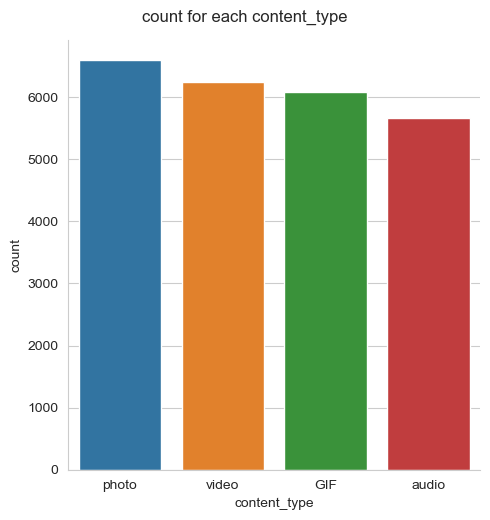

In [33]:
# set style for seaborn.
sns.set_style('whitegrid')

# visualization of count for each content_type.
sns.catplot(kind='count', data=df, x='content_type')\
    .fig.suptitle('count for each content_type', y=1.03)

## **Q:How many count for each content_type regarding to Sentiment?**

In [34]:
df.groupby(['content_type', 'Sentiment']).agg({'Sentiment':'count'})

Sentiment
content_type Sentiment           
GIF          negative        1924
             neutral          774
             positive        3381
audio        negative        1771
             neutral          673
             positive        3216
photo        negative        2057
             neutral          832
             positive        3700
video        negative        1943
             neutral          792
             positive        3510

Text(0.5, 1.03, 'count for each content_type regarding to Sentiment')

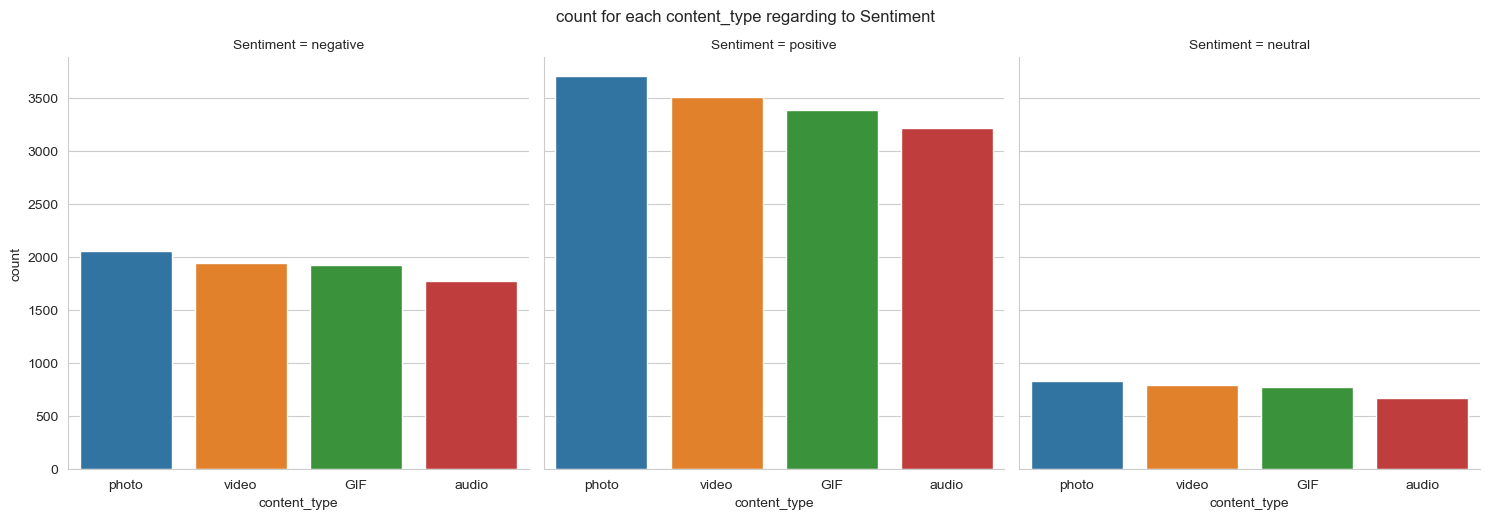

In [35]:
sns.catplot(kind='count', data=df, x='content_type', col='Sentiment')\
    .fig.suptitle('count for each content_type regarding to Sentiment', y=1.03)

## **Q:How many count by reactions_type for each content_type?**

In [36]:
content_type_reactions_type = df.pivot_table(index='content_type', columns='reactions_type', values='Content ID', aggfunc='count')
content_type_reactions_type

reactions_type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried
content_type,,,,,,,,,,,,,,,,
GIF,398,366,370,392,416,391,372,418,343,382,368,402,378,368,347,368
audio,343,356,350,365,352,382,323,362,340,328,365,350,356,374,366,348
photo,432,400,427,385,413,443,404,363,395,414,432,428,440,392,429,392
video,375,379,379,406,371,406,413,406,397,396,369,379,398,385,397,389


Text(0.5, 1.03, 'count by reactions_type for each content_type')

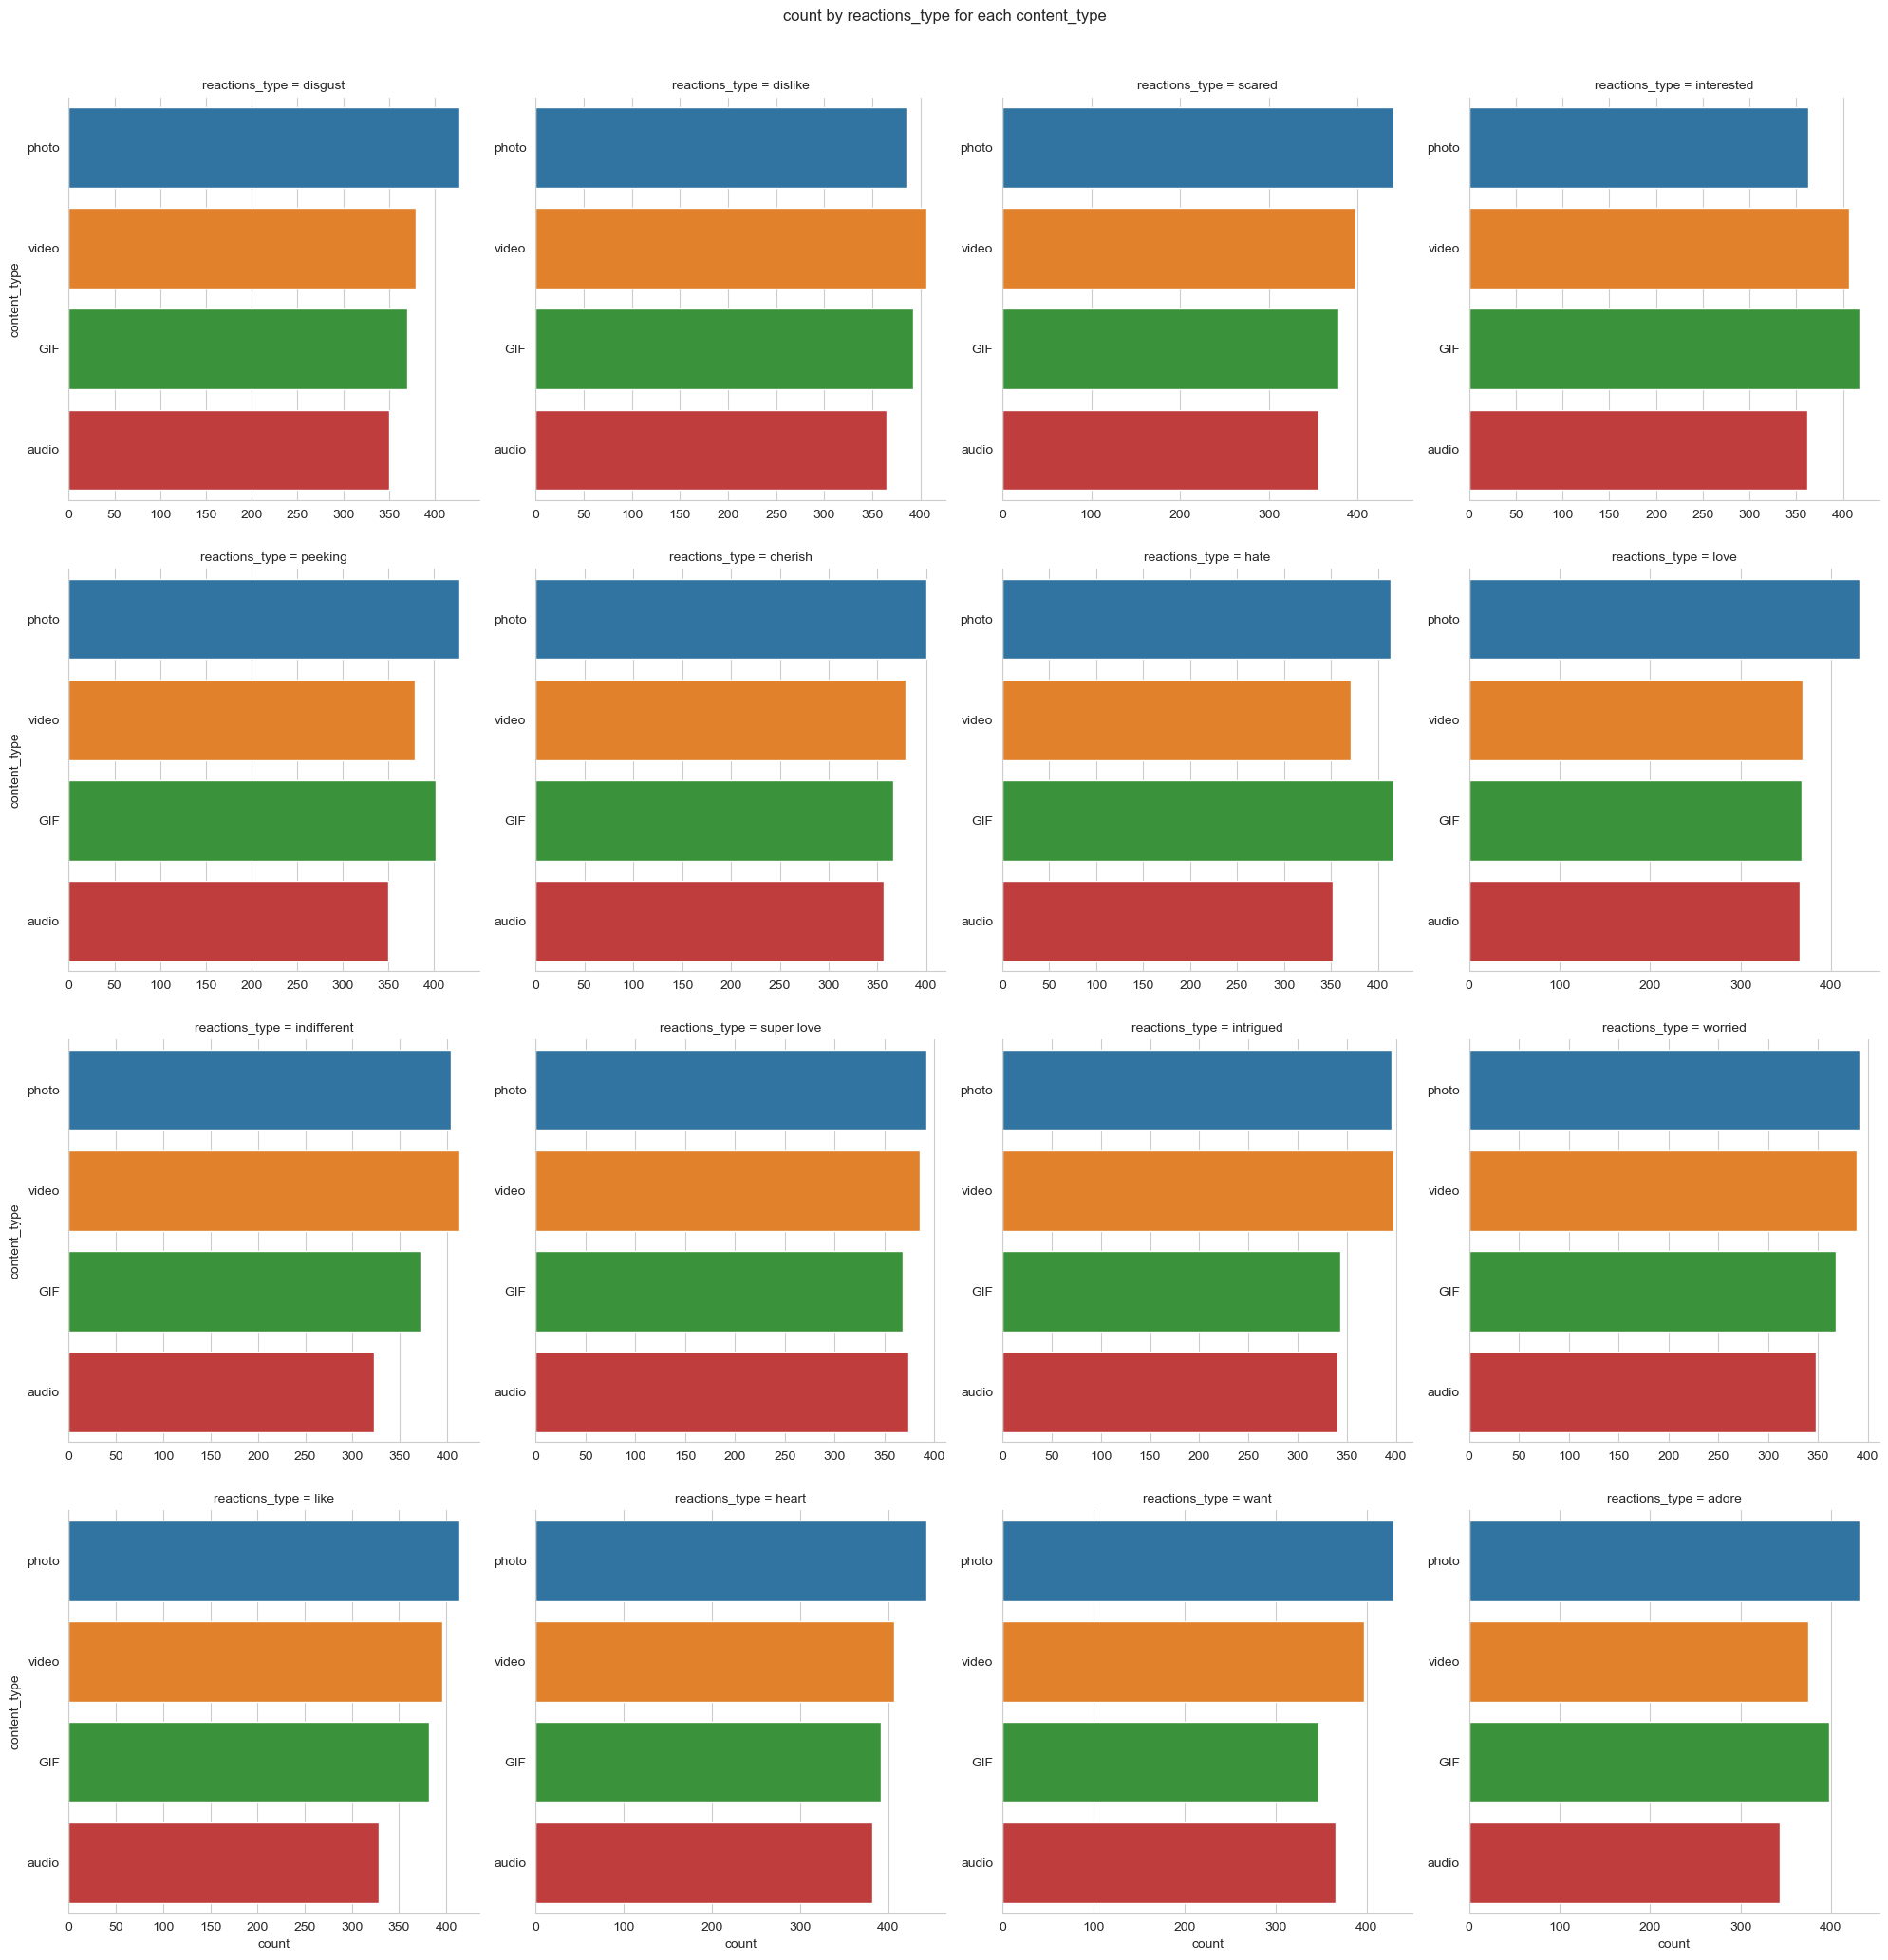

In [37]:
cat_order = ['photo', 'video', 'GIF', 'audio']
sns.catplot(kind='count', data=df, y='content_type', col='reactions_type', col_wrap=4, order=cat_order, sharey=False, sharex=False)\
    .fig.suptitle('count by reactions_type for each content_type', y=1.03)

## **Q:How many count by Category for each content_type?**

In [38]:
content_type_category = df.pivot_table(index='Category', columns='content_type', values='Content ID', aggfunc='count')
content_type_category

content_type,GIF,audio,photo,video
Category,,,,
animals,342,570,674,311
cooking,512,379,450,323
culture,490,396,432,358
dogs,200,233,330,575
education,192,318,548,375
fitness,322,317,328,428
food,444,401,364,490
healthy eating,390,503,332,492
public speaking,139,253,320,505


Text(0.5, 1.03, 'count by Category for each content_type')

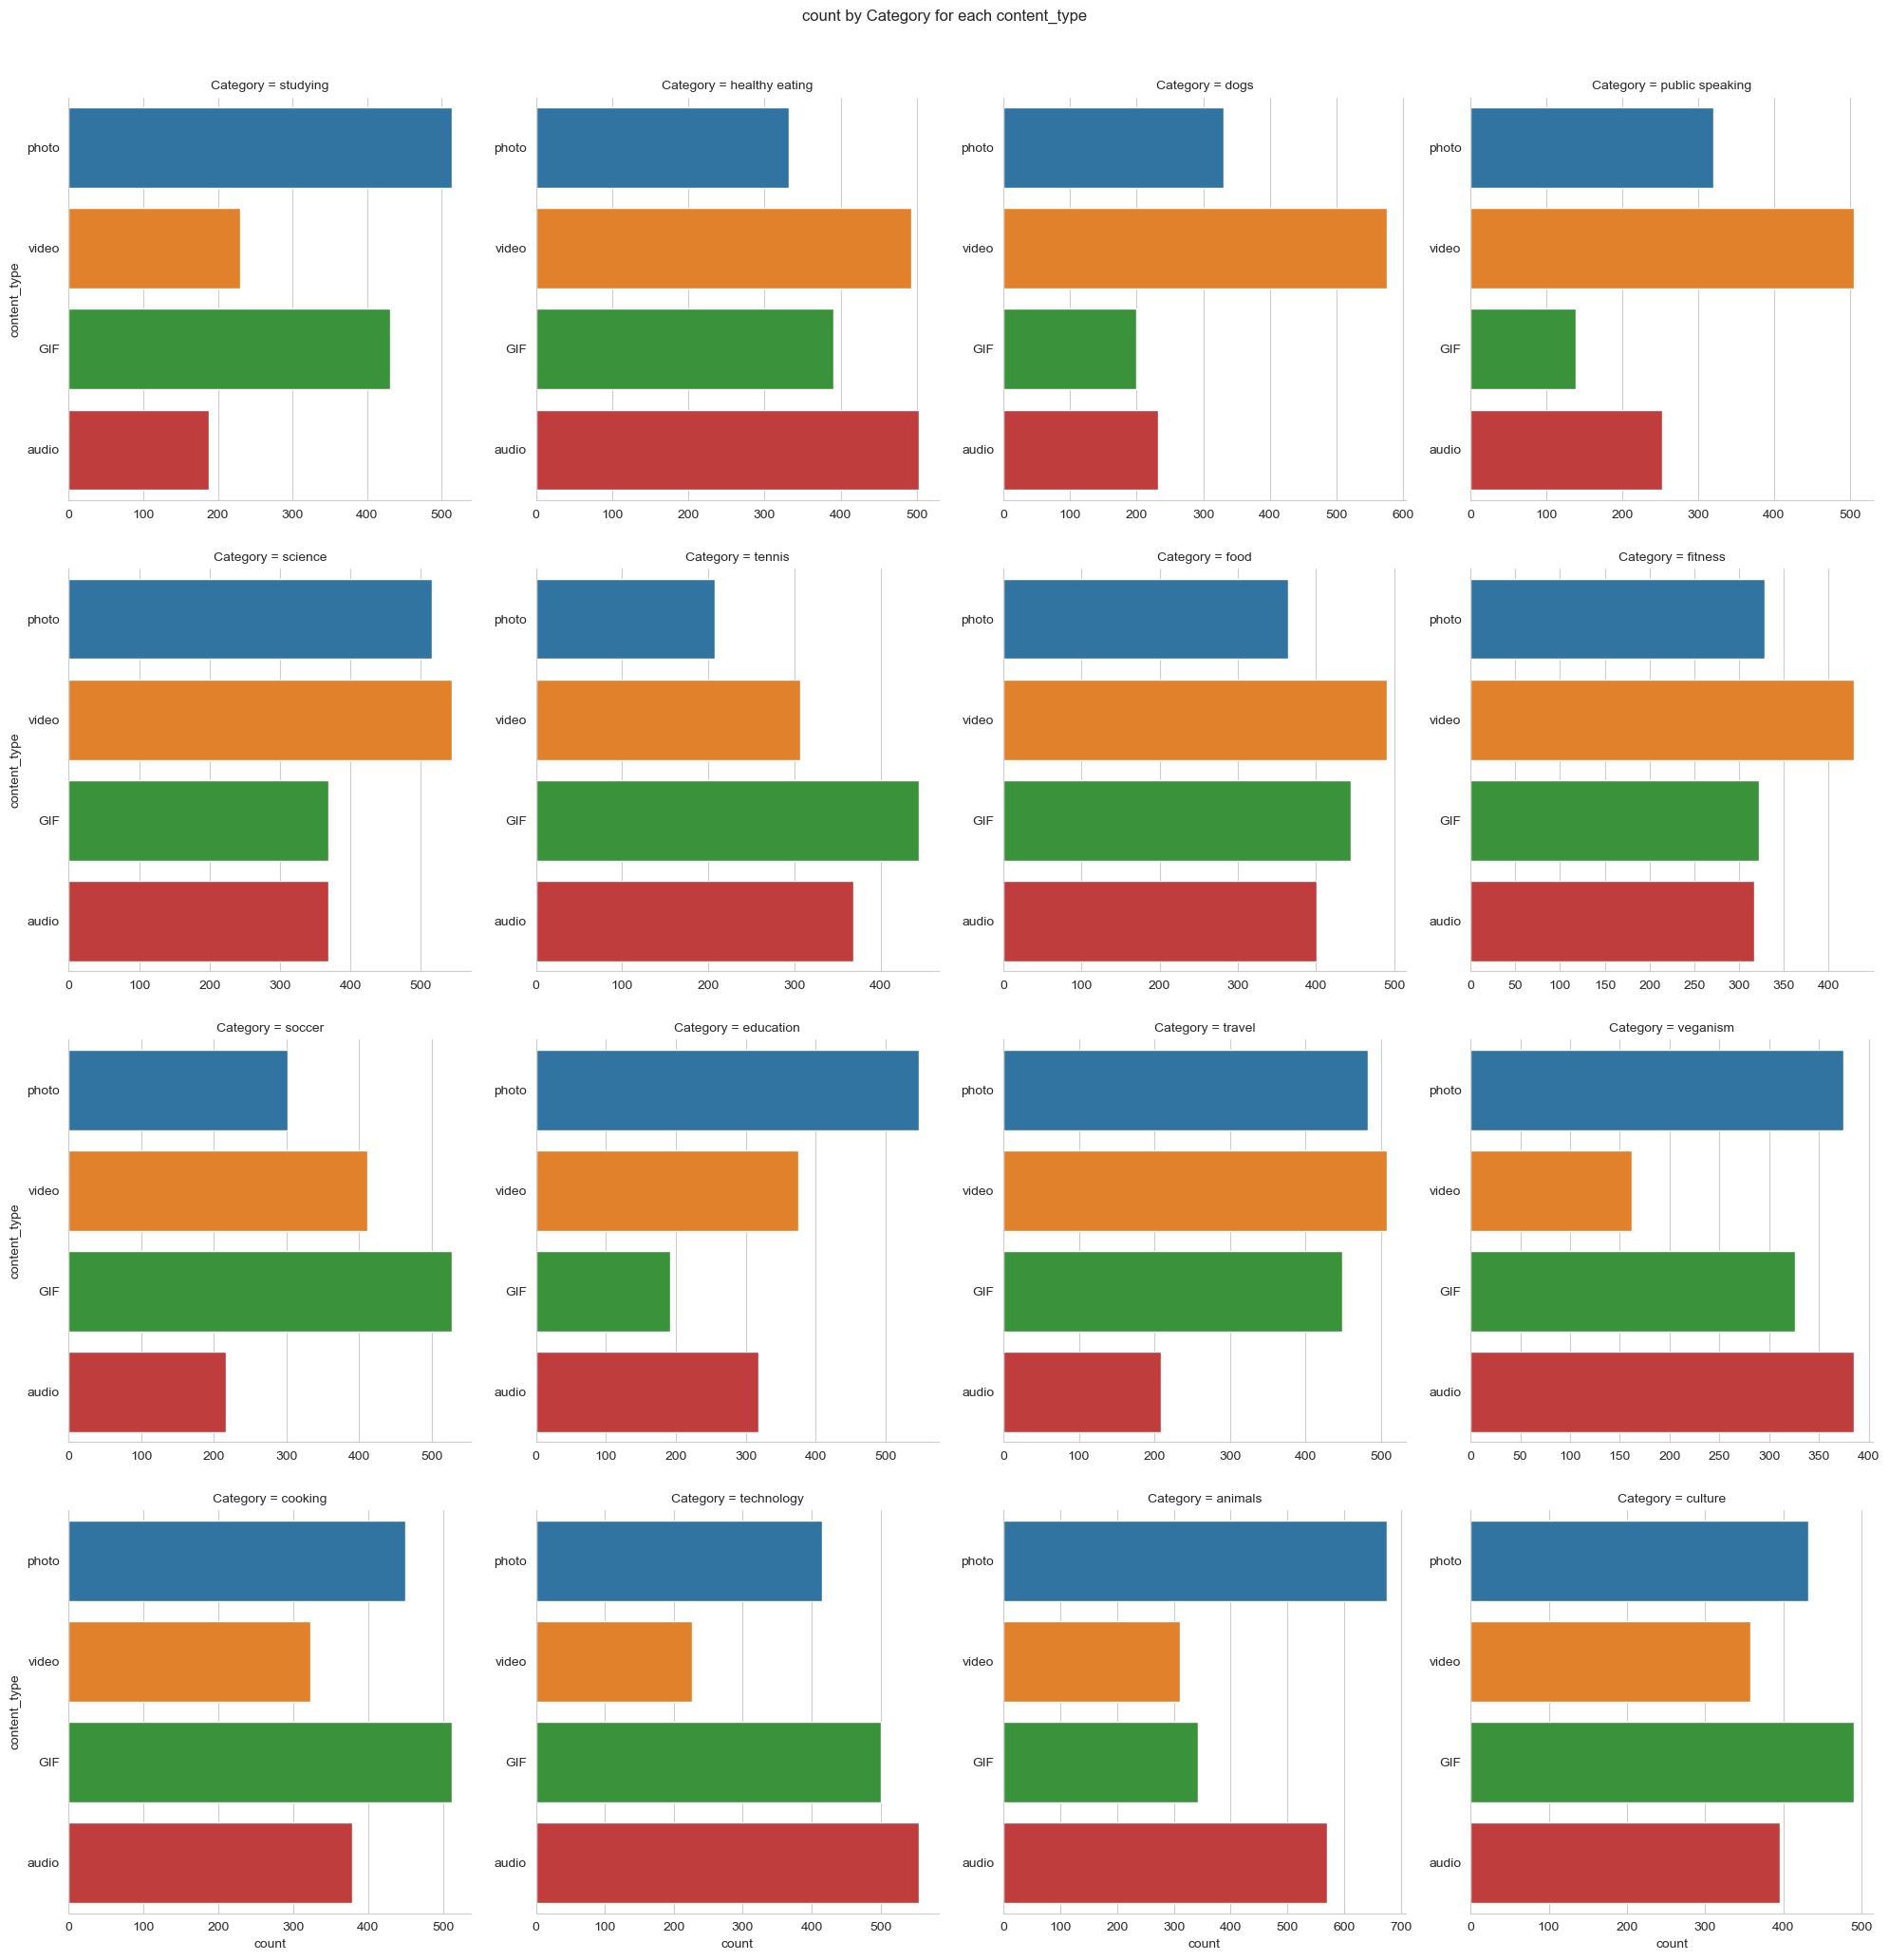

In [39]:
sns.catplot(kind='count', data=df, y='content_type', col='Category', col_wrap=4, order=cat_order, sharex=False, sharey=False)\
    .fig.suptitle('count by Category for each content_type', y=1.03)

## **Q:How many count by Sentiment for each content_type regarding to Category?**

In [40]:
content_type_Sentiment_Category_group = df.groupby(['content_type', 'Sentiment', 'Category']).agg({'Content ID':'count'})
content_type_Sentiment_Category_group

Content ID
content_type Sentiment Category              
GIF          negative  animals            126
                       cooking            157
                       culture            159
                       dogs                58
                       education           56
...                                       ...
video        positive  studying           127
                       technology         131
                       tennis             169
                       travel             278
                       veganism            89

[192 rows x 1 columns]

Text(0.5, 1.01, 'count by Sentiment for each content_type regarding to Category')

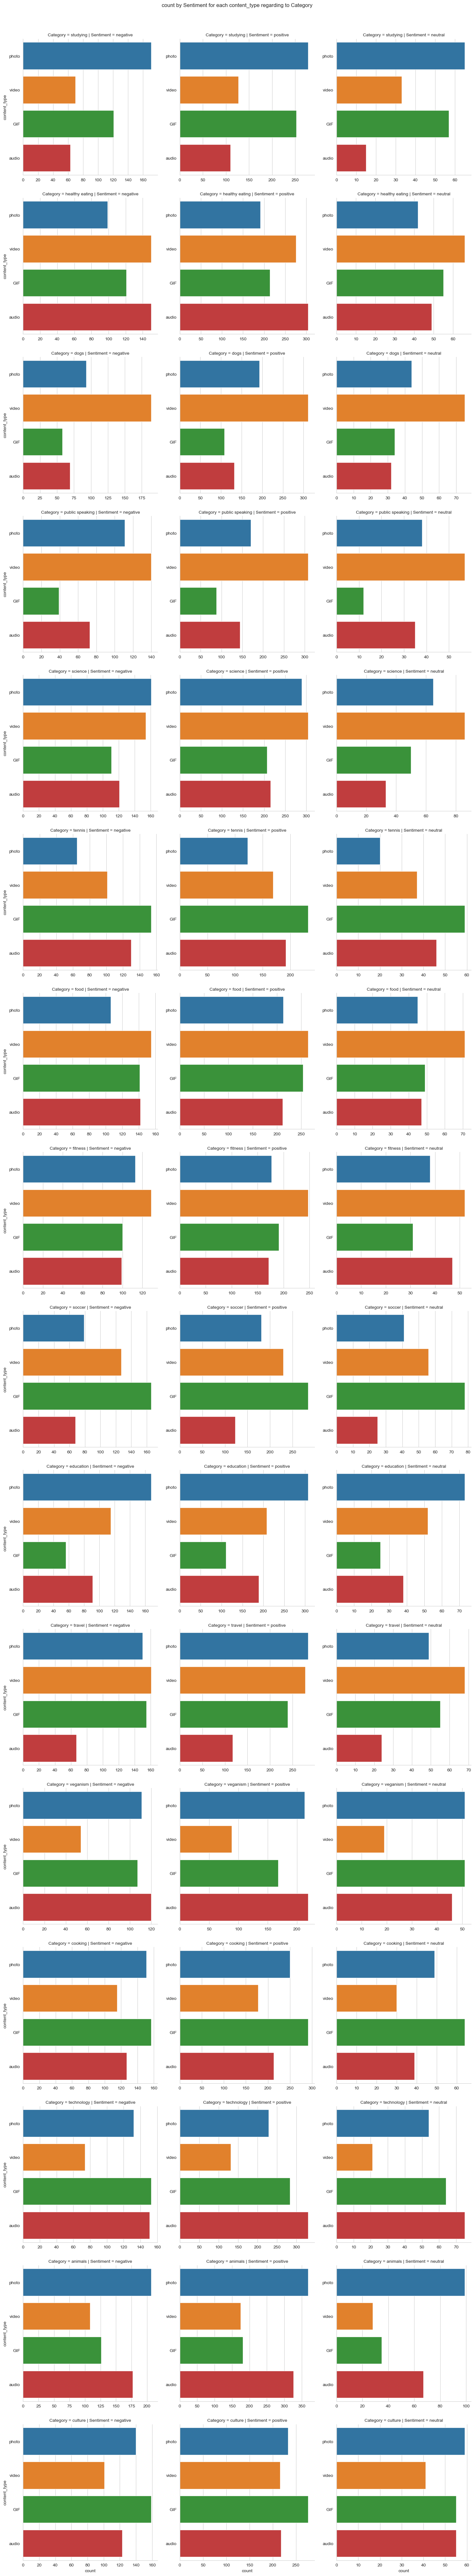

In [41]:
sns.catplot(kind='count', data=df, y='content_type', row='Category', col='Sentiment', order=cat_order, sharex=False, sharey=False)\
    .fig.suptitle('count by Sentiment for each content_type regarding to Category', y=1.01)

## **Q:What is the sum of score for each content_type?**

In [42]:
content_type_score_sum = df.groupby('content_type').agg({'Score':'sum'}).sort_values(by='Score', ascending=False)
content_type_score_sum

,Score
content_type,
photo,262838
video,246463
GIF,238217
audio,226127


In [43]:
# create numpy array with index value of content_type_score_sum DataFrame.
content_type = np.array(content_type_score_sum.index)

# creat new column 'content_type' in content_type_score_sum DataFrame.
content_type_score_sum['content_type'] = content_type

# reset index of content_type_score_sum DataFrame by numpy array from 0 to length of (np.array) content_type.
content_type_score_sum.set_index(np.array(range(0, len(content_type), 1)), inplace=True)
content_type_score_sum

,Score,content_type
0,262838,photo
1,246463,video
2,238217,GIF
3,226127,audio


Text(0.5, 1.03, 'the sum of score for each content_type')

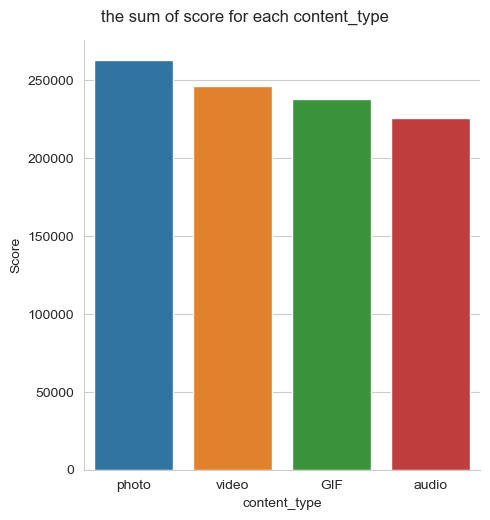

In [44]:
sns.catplot(kind='bar', data=content_type_score_sum, x='content_type', y='Score').fig.suptitle('the sum of score for each content_type', y=1.03)

## **Q:What kind of distribution for Score?**

In [45]:
df['Score'].describe()

count    24573.000000
mean        39.622553
std         26.043011
min          0.000000
25%         15.000000
50%         35.000000
75%         65.000000
max         75.000000
Name: Score, dtype: float64

In [46]:
df['Score'].value_counts()

70    3040
60    1622
15    1572
35    1559
5     1552
30    1549
10    1548
72    1548
65    1534
0     1526
50    1520
75    1519
20    1512
12    1497
45    1475
Name: Score, dtype: int64

<Axes: xlabel='Score', ylabel='Count'>

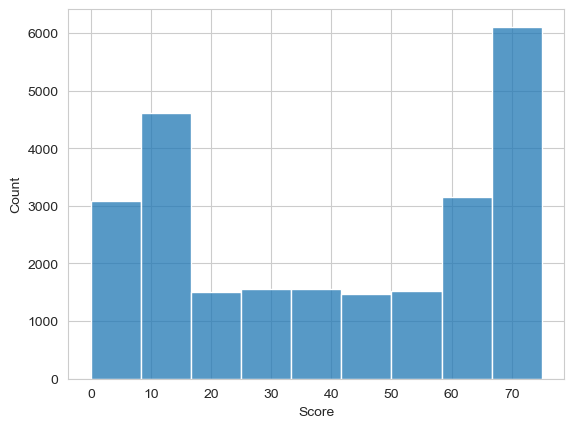

In [47]:
sns.histplot(data=df, x='Score', bins=9)

## **Q:What is the date for score between 20 & 50?**

In [48]:
score_20_50 = df[(df['Score'] >= 20) & (df['Score'] <= 50)]
score_20_50

,Content ID,content_type,Category,reactions_type,Datetime,Sentiment,Score
4646,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30
4647,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-11-01 01:16:21,positive,30
4648,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2021-05-22 19:44:23,positive,30
4649,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2021-03-07 12:40:11,positive,30
4650,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2021-02-04 03:06:12,positive,30
...,...,...,...,...,...,...,...
19859,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,like,2021-03-17 09:32:28,positive,50
19860,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,like,2020-08-11 18:26:41,positive,50
19861,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,like,2020-12-02 01:36:50,positive,50
19862,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,like,2020-09-28 23:55:23,positive,50


In [49]:
score_20_50_avg = score_20_50.groupby('Datetime').agg({'Score':'mean'})
score_20_50_avg

,Score
Datetime,
2020-06-18 08:51:33,45.0
2020-06-18 11:33:40,30.0
2020-06-18 11:38:25,30.0
2020-06-18 12:44:32,50.0
2020-06-18 14:43:40,50.0
...,...
2021-06-18 05:32:18,20.0
2021-06-18 05:40:08,35.0
2021-06-18 06:44:04,50.0


In [50]:
score_20_50_avg['date'] = score_20_50_avg.index
score_20_50_avg

,Score,date
Datetime,,
2020-06-18 08:51:33,45.0,2020-06-18 08:51:33
2020-06-18 11:33:40,30.0,2020-06-18 11:33:40
2020-06-18 11:38:25,30.0,2020-06-18 11:38:25
2020-06-18 12:44:32,50.0,2020-06-18 12:44:32
2020-06-18 14:43:40,50.0,2020-06-18 14:43:40
...,...,...
2021-06-18 05:32:18,20.0,2021-06-18 05:32:18
2021-06-18 05:40:08,35.0,2021-06-18 05:40:08
2021-06-18 06:44:04,50.0,2021-06-18 06:44:04


In [51]:
score_20_50_avg.set_index(np.array(range(0, len(score_20_50_avg.index), 1)), inplace=True)
score_20_50_avg

,Score,date
0,45.0,2020-06-18 08:51:33
1,30.0,2020-06-18 11:33:40
2,30.0,2020-06-18 11:38:25
3,50.0,2020-06-18 12:44:32
4,50.0,2020-06-18 14:43:40
...,...,...
7609,20.0,2021-06-18 05:32:18
7610,35.0,2021-06-18 05:40:08
7611,50.0,2021-06-18 06:44:04
7612,50.0,2021-06-18 07:44:58


In [52]:
score_20_50_avg['year'] = score_20_50_avg['date'].dt.year
score_20_50_avg

,Score,date,year
0,45.0,2020-06-18 08:51:33,2020
1,30.0,2020-06-18 11:33:40,2020
2,30.0,2020-06-18 11:38:25,2020
3,50.0,2020-06-18 12:44:32,2020
4,50.0,2020-06-18 14:43:40,2020
...,...,...,...
7609,20.0,2021-06-18 05:32:18,2021
7610,35.0,2021-06-18 05:40:08,2021
7611,50.0,2021-06-18 06:44:04,2021
7612,50.0,2021-06-18 07:44:58,2021


In [53]:
score_20_50_avg['month'] = score_20_50_avg['date'].dt.month
score_20_50_avg

,Score,date,year,month
0,45.0,2020-06-18 08:51:33,2020,6
1,30.0,2020-06-18 11:33:40,2020,6
2,30.0,2020-06-18 11:38:25,2020,6
3,50.0,2020-06-18 12:44:32,2020,6
4,50.0,2020-06-18 14:43:40,2020,6
...,...,...,...,...
7609,20.0,2021-06-18 05:32:18,2021,6
7610,35.0,2021-06-18 05:40:08,2021,6
7611,50.0,2021-06-18 06:44:04,2021,6
7612,50.0,2021-06-18 07:44:58,2021,6


In [54]:
score_20_50_avg.rename(columns={'Score':'score_avg'}, inplace=True)
score_20_50_avg

,score_avg,date,year,month
0,45.0,2020-06-18 08:51:33,2020,6
1,30.0,2020-06-18 11:33:40,2020,6
2,30.0,2020-06-18 11:38:25,2020,6
3,50.0,2020-06-18 12:44:32,2020,6
4,50.0,2020-06-18 14:43:40,2020,6
...,...,...,...,...
7609,20.0,2021-06-18 05:32:18,2021,6
7610,35.0,2021-06-18 05:40:08,2021,6
7611,50.0,2021-06-18 06:44:04,2021,6
7612,50.0,2021-06-18 07:44:58,2021,6
